# Overview
Hacker News is a site started by the startup incubator Y Combinator, where user-submitted stories (known as "stories") are voted and commented upon, similar to reddit. Hacker News is extremely popular in technology and startup circles; stories that make it to the top of Hacker News' listings can get hundreds of thousands of visitors.

The dataset we will be working with is based off this CSV of Hacker News stories from September 2015 to September 2016. The columns in the dataset are explained below:

- id: The unique identifier from Hacker News for the story
- title: The title of the story
- url: The URL that the stories links to, if the story has a URL
- num_points: The number of points the story acquired, calculated as the total number of upvotes minus the total number of downvotes
- num_comments: The number of comments that were made on the story
- author: The username of the person who submitted the story
- created_at: The date and time at which the story was submitted

In [1]:
import pandas as pd
hn = pd.read_csv("hacker_news.csv")
hn.head()

,id,title,url,num_points,num_comments,author,created_at
0,12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,8/4/2016 11:52
1,11964716,Florida DJs May Face Felony for April Fools' W...,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash,6/23/2016 22:20
2,11919867,Technology ventures: From Idea to Enterprise,https://www.amazon.com/Technology-Ventures-Ent...,3,1,hswarna,6/17/2016 0:01
3,10301696,Note by Note: The Making of Steinway L1037 (2007),http://www.nytimes.com/2007/11/07/movies/07ste...,8,2,walterbell,9/30/2015 4:12
4,10482257,Title II kills investment? Comcast and other I...,http://arstechnica.com/business/2015/10/comcas...,53,22,Deinos,10/31/2015 9:48


The re module. This module contains a number of different functions and classes for working with regular expressions. One of the most useful functions from the re module is the re.search() function, which takes two required arguments:

- The regex pattern
- The string we want to search that pattern for

In [2]:
#import re functions
import re

#initial a list for titles
titles = hn["title"].tolist()

#empty count
python_mentions = 0

#pattern for re function
pattern = "[Pp]ython"

#for loop to count each time a pattern is found in title
for title in titles:
    if re.search(pattern, title):
        python_mentions += 1

#output
print(python_mentions)

160


In [3]:
#get same results as previous code with contains() and sum()
pattern = '[Pp]ython'
titles = hn['title']

# alternate way
python_mentions = titles.str.contains(pattern).sum()

print(python_mentions)

160


On the previous two screens, I used regular expressions to count how many titles contain Python or python. What if we wanted to view those titles?

In that case, we can use the boolean array returned by Series.str.contains() to select just those rows from our series.

In [4]:
titles = hn['title']
pattern = "[Rr]uby"

# Using a boolen to index title names with pattern Ruby/ruby
ruby_titles = titles[titles.str.contains(pattern)]

ruby_titles.head()

190                    Ruby on Google AppEngine Goes Beta
484          Related: Pure Ruby Relational Algebra Engine
1388    Show HN: HTTPalooza  Ruby's greatest HTTP clie...
1949    Rewriting a Ruby C Extension in Rust: How a Na...
2022    Show HN: CrashBreak  Reproduce exceptions as f...
Name: title, dtype: object

If I wanted to write a pattern that matches the numbers in text from 1000 to 2999 I could write the regular expression below:

    [1-2][0-9]{3}
 
The {} brackets represent how many times the previous [] will be appeared.

The name for this type of regular expression syntax is called a quantifier. Quantifiers specify how many of the previous character our pattern requires, which can help us when we want to match substrings of specific lengths. 

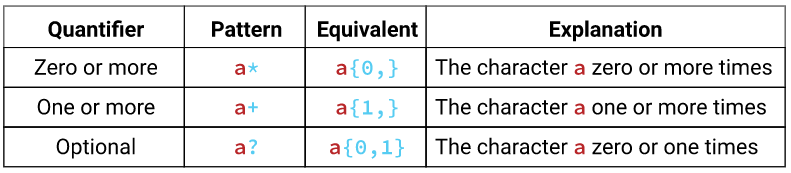

In [5]:
titles = hn['title']

#create a boolean mask that matches items from titles containing email or e-mail.
email_bool = titles.str.contains("e-?mail")

#count the number of titles that matched the regular expression.
email_count = email_bool.sum()
print(email_count)

#select only the items from titles that matched the regular expression
email_titles = titles[email_bool]
print(email_titles)

86
119      Show HN: Send an email from your shell to your...
313          Disposable emails for safe spam free shopping
1361     Ask HN: Doing cold emails? helps us prove this...
1750     Protect yourself from spam, bots and phishing ...
2421                    Ashley Madison hack treating email
                               ...                        
18098    House panel looking into Reddit post about Cli...
18583    Mailgen  Generates clean, responsive HTML for ...
18847    Show HN: Crisp iOS keyboard for email and text...
19303    Ask HN: Why big email providers don't sign the...
19446    Tell HN: Secure email provider Riseup will run...
Name: title, Length: 86, dtype: object


To match unknown characters using regular expressions, we use character classes. Character classes allow us to match certain groups of characters. We've actually seen two examples of character classes already:

The set notation using brackets to match any of a number of characters.
The range notation, which we used to match ranges of digits (like [0-9]).

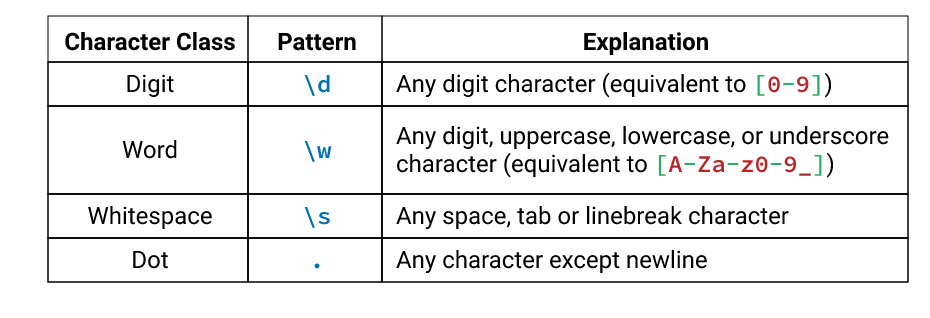

There are two new things we can observe from this table:

- Ranges can be used for letters as well as numbers.
- Sets and ranges can be combined.

In [6]:
#Create a pattern to findd titles that have name like [xxx]
pattern = "\[\w+\]"

tag_titles = titles[titles.str.contains(pattern)]
print(tag_titles.head())

#Count how many matching titles
tag_count = tag_titles.count()

66     Analysis of 114 propaganda sources from ISIS, ...
100    Munich Gunman Got Weapon from the Darknet [Ger...
159         File indexing and searching for Plan 9 [pdf]
162    Attack on Kunduz Trauma Centre, Afghanistan  I...
195               [Beta] Speedtest.net  HTML5 Speed Test
Name: title, dtype: object


In [7]:
#We use the Series.str.extract() method to extract the match within our parentheses:

tag_5 = tag_titles.head()

pattern = r"(\[\w+\])"
tag_5_matches = tag_5.str.extract(pattern)
print(tag_5_matches)

            0
66      [pdf]
100  [German]
159     [pdf]
162     [pdf]
195    [Beta]


In [8]:
#We can move our parentheses inside the brackets to get just the text:

pattern = r"\[(\w+)\]"
tag_5_matches = tag_5.str.extract(pattern)
print(tag_5_matches)

          0
66      pdf
100  German
159     pdf
162     pdf
195    Beta


In [ ]:
pattern = r"\[(\w+)\]"

tag_freq = titles.str.extract(pattern).value_counts()

We can exclude titles by using negative character classes. Negative character classes are character classes that match every character except a character class. Here are common negative character classes:

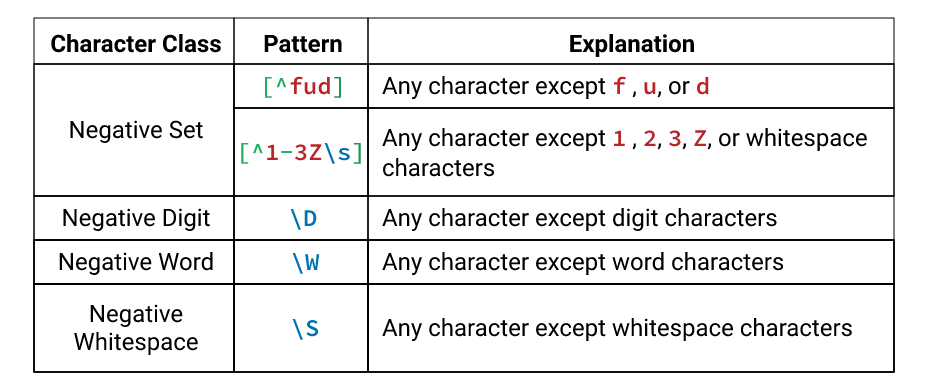

In [10]:
#include Jave/java but exclude Javascript
pattern = r"[Jj]ava[^Ss]"
java_titles = titles[titles.str.contains(pattern)]
java_titles.head()

436     Unikernel Power Comes to Java, Node.js, Go, an...
811     Ask HN: Are there any projects or compilers wh...
1840                    Adopting RxJava on the Airbnb App
1972          Node.js vs. Java: Which Is Faster for APIs?
2093                    Java EE and Microservices in 2016
Name: title, dtype: object

In [11]:
# function for first 10 matches to a pattern

def first_5_matches(pattern):
    """
    Return the first 10 story titles that match
    the provided regular expression
    """
    all_matches = titles[titles.str.contains(pattern)]
    first_5 = all_matches.head(5)
    return first_5

first_5_matches("[Jj]ava[^Ss]")

436     Unikernel Power Comes to Java, Node.js, Go, an...
811     Ask HN: Are there any projects or compilers wh...
1840                    Adopting RxJava on the Airbnb App
1972          Node.js vs. Java: Which Is Faster for APIs?
2093                    Java EE and Microservices in 2016
Name: title, dtype: object

A word boundary matches the position between a word character and a non-word character, or a word character and the start/end of a string.

In [12]:
#titles only the items that match the regular expression
pattern = r"\b[Jj]ava\b"
java_titles = titles[titles.str.contains(pattern)]
java_titles.head()

436     Unikernel Power Comes to Java, Node.js, Go, an...
811     Ask HN: Are there any projects or compilers wh...
1023                         Pippo  Web framework in Java
1972          Node.js vs. Java: Which Is Faster for APIs?
2093                    Java EE and Microservices in 2016
Name: title, dtype: object

More generally in regular expressions, an anchor matches something that isn't a character, as opposed to character classes which match specific characters.

Other than the word boundary anchor, the other two most common anchors are the beginning anchor and the end anchor, which represent the start and the end of the string, respectfully.

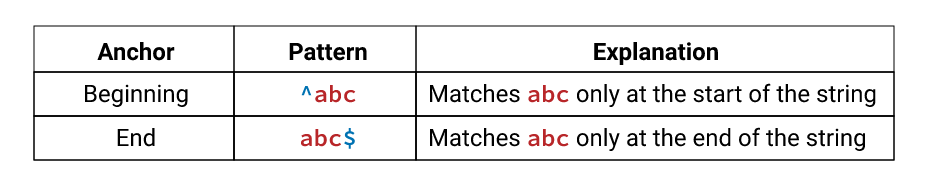

In [13]:
#number of times that a tag (e.g. [pdf] or [video]) occurs at the start of a title in titles.
pattern_beginning = r"^\[\w+\]"     # contain all letters between []
beginning_count = titles[titles.str.contains(pattern_beginning)].count()
print(beginning_count)

#number of times that a tag (e.g. [pdf] or [video]) occurs at the end of a title in titles.
pattern_ending = r"\[\w+\]$"        # contain all letters between []
ending_count = titles[titles.str.contains(pattern_ending)].count()
print(ending_count)

15
417


we can use flags to specify that our regular expression should ignore case.

Both re.search() and the pandas regular expression methods accept an optional flags argument. This argument accepts one or more flags, which are special variables in the re module that modify the behavior of the regex interpreter.

A list of all available flags is in the documentation, but by far the most common and the most useful is the re.IGNORECASE flag, which is also available using the alias re.I

In [14]:
import re

email_tests = pd.Series(['email', 'Email', 'e Mail', 'e mail', 'E-mail',
              'e-mail', 'eMail', 'E-Mail', 'EMAIL'])

email_tests.str.contains(r"email",flags=re.I).count()

pattern = r"\be[\-\s]?mail"    #? means the - or "space" is optional
email_mentions = titles.str.contains(pattern, flags=re.I).sum()
email_mentions

143

In [15]:
#Use that regex pattern and the ignorecase flag to count the number of mentions of SQL in titles.
pattern =r"sql"
sql_counts = titles.str.contains(pattern, flags = re.I).sum()
sql_counts

108

In [16]:
#reated a new dataframe, hn_sql, including only rows that mention a SQL flavor.
hn_sql = hn[hn['title'].str.contains(r"\w+SQL", flags=re.I)].copy()

pattern = r"(\w+sql)"

hn_sql["flavor"] = hn_sql["title"].str.extract(pattern, re.I)

hn_sql["flavor"] = hn_sql["flavor"].str.lower()

sql_pivot = hn_sql.pivot_table(index="flavor",values="num_comments", aggfunc='mean')
sql_pivot

,num_comments
flavor,
cloudsql,5.000000
memsql,14.000000
mysql,12.230769
nosql,14.529412
postgresql,25.962963
sparksql,1.000000


In [ ]:
pattern = r"[Pp]ython ([\d\.]+)"

py_versions = titles.str.extract(pattern)

py_versions_freq = dict(py_versions.value_counts())

In [20]:
def first_10_matches(pattern):
    """
    Return the first 10 story titles that match
    the provided regular expression
    """
    all_matches = titles[titles.str.contains(pattern)]
    first_10 = all_matches.head(10)
    return first_10

first_10_matches(r"\b[Cc]\b")

13                 Custom Deleters for C++ Smart Pointers
220                        Lisp, C++: Sadness in my heart
221                  MemSQL (YC W11) Raises $36M Series C
353     VW C.E.O. Personally Apologized to President O...
365                      The new C standards are worth it
444           Moz raises $10m Series C from Foundry Group
508     BDE 3.0 (Bloomberg's core C++ library): Open S...
521          Fuchsia: Micro kernel written in C by Google
549     How to Become a C.E.O.? The Quickest Path Is a...
1282    A lightweight C++ signals and slots implementa...
Name: title, dtype: object

Immediately, the results are reasonably relevant. However, I can quickly identify a few match types we want to prevent:

- Mentions of C++, a distinct language from C.
- Cases where the letter C is followed by a period, like in the substring C.E.O.

In [21]:
#updated pattern
first_10_matches(r"\b[Cc]\b[^+.]")

365                      The new C standards are worth it
444           Moz raises $10m Series C from Foundry Group
521          Fuchsia: Micro kernel written in C by Google
1307            Show HN: Yupp, yet another C preprocessor
1326                     The C standard formalized in Coq
1365                          GNU C Library 2.23 released
1429    Cysignals: signal handling (SIGINT, SIGSEGV, )...
1620                        SDCC  Small Device C Compiler
1949    Rewriting a Ruby C Extension in Rust: How a Na...
2195    MyHTML  HTML Parser on Pure C with POSIX Threa...
Name: title, dtype: object

In [22]:
# match C/c, exclude . or + and exclude where "Series" precedes the match

pattern = r"(?<!Series\s)\b[Cc]\b(?![\+\.])"
c_mentions = titles.str.contains(pattern).sum()
c_mentions

102

A regular expression to match cases of repeated words

In [29]:
pattern = r"\b(\w+)\s\1\b"
repeated_words = titles[titles.str.contains(pattern)]
repeated_words

C:\Users\jason\Anaconda3\lib\site-packages\pandas\core\strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


3102                  Silicon Valley Has a Problem Problem
3176                Wire Wire: A West African Cyber Threat
3178                         Flexbox Cheatsheet Cheatsheet
4797                            The Mindset Mindset (2015)
7276     Valentine's Day Special: Bye Bye Tinder, Flirt...
10371    Mcdonalds copying cyriak  cows cows cows in th...
11575                                    Bang Bang Control
11901          Cordless Telephones: Bye Bye Privacy (1991)
12697          Solving the the Monty-Hall-Problem in Swift
15049    Bye Bye Webrtc2SIP: WebRTC with Asterisk and A...
15839          Intellij-Rust Rust Plugin for IntelliJ IDEA
Name: title, dtype: object

Replace all mentions of email in titles with "email"

In [30]:
email_variations = pd.Series(['email', 'Email', 'e Mail',
                        'e mail', 'E-mail', 'e-mail',
                        'eMail', 'E-Mail', 'EMAIL'])

pattern = r"e[\-\s]?mail"

#test it worked
email_uniform = email_variations.str.replace(pattern, "email", flags = re.I)

#use it on dataset
titles_clean = titles.str.replace(pattern, "email", flags=re.I)

In [50]:
test_urls = pd.Series([
 'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429',
 'http://www.interactivedynamicvideo.com/',
 'http://www.nytimes.com/2007/11/07/movies/07stein.html?_r=0',
 'http://evonomics.com/advertising-cannot-maintain-internet-heres-solution/',
 'HTTPS://github.com/keppel/pinn',
 'Http://phys.org/news/2015-09-scale-solar-youve.html',
 'https://iot.seeed.cc',
 'http://www.bfilipek.com/2016/04/custom-deleters-for-c-smart-pointers.html',
 'http://beta.crowdfireapp.com/?beta=agnipath',
 'https://www.valid.ly?param'
])

pattern = r"https?://([\w\.]+)"

#test it on sample series
test_urls_clean = test_urls.str.extract(pattern, flags = re.I)

#use on dataset
domain_series = pd.Series(hn['url'])
domain_series
                        
domains = hn['url'].str.extract(pattern, flags = re.I)
domains

,0
0,www.interactivedynamicvideo.com
1,www.thewire.com
2,www.amazon.com
3,www.nytimes.com
4,arstechnica.com
...,...
20094,puri.sm
20095,medium.com
20096,blog.darknedgy.net
20097,medium.com


Extract each of the three component parts of the URLs:

1. Protocol
2. Domain
3. Page path

In [52]:
pattern = r"(.+)://([\w\.]+)/?(.*)"

url_parts = hn['url'].str.extract(pattern)
url_parts

,0,1,2
0,http,www.interactivedynamicvideo.com,
1,http,www.thewire.com,entertainment/2013/04/florida-djs-april-fools-...
2,https,www.amazon.com,Technology-Ventures-Enterprise-Thomas-Byers/dp...
3,http,www.nytimes.com,2007/11/07/movies/07stein.html?_r=0
4,http,arstechnica.com,business/2015/10/comcast-and-other-isps-boost-...
...,...,...,...
20094,https,puri.sm,philosophy/how-purism-avoids-intels-active-man...
20095,https,medium.com,@zreitano/the-yc-application-broken-down-and-t...
20096,http,blog.darknedgy.net,technology/2016/01/01/0/
20097,https,medium.com,@benjiwheeler/how-product-hunt-really-works-d8...


Name these columns

In [54]:
pattern = r"(?P<protocol>.+)://(?P<domain>[\w\.]+)/?(?P<path>.*)"
url_parts = hn['url'].str.extract(pattern)
url_parts

,protocol,domain,path
0,http,www.interactivedynamicvideo.com,
1,http,www.thewire.com,entertainment/2013/04/florida-djs-april-fools-...
2,https,www.amazon.com,Technology-Ventures-Enterprise-Thomas-Byers/dp...
3,http,www.nytimes.com,2007/11/07/movies/07stein.html?_r=0
4,http,arstechnica.com,business/2015/10/comcast-and-other-isps-boost-...
...,...,...,...
20094,https,puri.sm,philosophy/how-purism-avoids-intels-active-man...
20095,https,medium.com,@zreitano/the-yc-application-broken-down-and-t...
20096,http,blog.darknedgy.net,technology/2016/01/01/0/
20097,https,medium.com,@benjiwheeler/how-product-hunt-really-works-d8...
